In [15]:
## Working Notebook to add confeernce affilation to game data table

# Dependencies

import pandas as pd
import re
import numpy as np
import ast
import matplotlib.pyplot as plt
# import sns
import seaborn as sns

# Load Data
conference_df = pd.read_csv('C:/Users/Justin/Desktop/Project/cfb_conferences/data/yearly_conference_members.csv')
games_df = pd.read_csv('C:/Users/Justin/Desktop/Project/cfb_conferences/data/cfb_scrape_raw.csv')

# rename Unnamed: 0 to year in conference_df
conference_df = conference_df.rename(columns={'Unnamed: 0': 'Year'})



# Convert string representations of lists back into actual lists
for col in conference_df.columns[1:]:
    conference_df[col] = conference_df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


C:\Users\Justin\AppData\Local\Temp\ipykernel_7448\3464750747.py:15: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  games_df = pd.read_csv('C:/Users/Justin/Desktop/Project/cfb_conferences/data/cfb_scrape_raw.csv')


In [16]:
# conference_df.sample(5)

games_df.sample(20)

# value countes of winner_ranking
# games_df['Winner_Ranking'].value_counts()

# find any rows with (number) in the winner olumn



,Rk,Wk,Date,Day,Winner,Pts,Unnamed: 6,Loser,Pts.1,Notes,Season,Time,Unnamed: 7
76836,230,5,"Sep 22, 2017",Fri,Virginia,42.0,NaN,Boise State,23.0,"Albertsons Stadium - Boise, Idaho",2017,8:00 PM,@
11087,26,1,"Sep 25, 1920",Sat,Virginia,27.0,NaN,William & Mary,0.0,NaN,1920,NaN,NaN
12532,388,7,"Nov 4, 1922",Sat,Ouachita,7.0,@,Mississippi State,7.0,NaN,1922,NaN,NaN
46413,65,2,"Sep 11, 1976",Sat,Purdue,31.0,NaN,Northwestern,19.0,NaN,1976,NaN,NaN
78963,599,11,"Nov 2, 2019",Sat,South Carolina,24.0,NaN,Vanderbilt,7.0,"Williams-Brice Stadium - Columbia, South Carolina",2019,NaN,NaN
10037,280,8,"Nov 3, 1917",Sat,Mississippi State,41.0,N,Mississippi,14.0,NaN,1917,NaN,NaN
44746,731,13,"Nov 24, 1973",Sat,West Virginia,24.0,@,Syracuse,14.0,NaN,1973,NaN,NaN
68431,171,3,"Sep 15, 2007",Sat,Nevada,52.0,NaN,Nicholls State,17.0,NaN,2007,NaN,NaN
3971,319,9,"Nov 7, 1903",Sat,Beloit,33.0,NaN,Wisconsin-Platteville,0.0,NaN,1903,NaN,NaN
80837,128,3,"Sep 10, 2022",Sat,Marshall,26.0,NaN,(8) Notre Dame,21.0,NaN,2022,2:30 PM,@


In [17]:
conference_df.columns
games_df.columns

Index(['Rk', 'Wk', 'Date', 'Day', 'Winner', 'Pts', 'Unnamed: 6', 'Loser',
       'Pts.1', 'Notes', 'Season', 'Time', 'Unnamed: 7'],
      dtype='object')

In [18]:
# Function to retrieve the conference based on year and team name
def get_conference_adjusted(year, team_name, conference_lookup):
    """
    Given a year and team name, retrieve the conference the team belongs to.
    If no conference found, return "Independent/Unknown".
    """
    return conference_lookup.get((year, team_name), "Independent/Unknown")

# Create a lookup dictionary for team-year to conference mapping
conference_lookup = {}

for _, row in conference_df.iterrows():
    year = row['Year']
    for col, teams in row[1:].items():
        for team in teams:
            conference_lookup[(year, team)] = col

# Use the adjusted function to assign conference for Winner and Loser
games_df['winner_conference'] = games_df.apply(lambda row: get_conference_adjusted(row['Season'], row['Winner'], conference_lookup), axis=1)
games_df['loser_conference'] = games_df.apply(lambda row: get_conference_adjusted(row['Season'], row['Loser'], conference_lookup), axis=1)

# Classify games as Regular Season or Post Season based on Date
games_df['Date'] = pd.to_datetime(games_df['Date'], errors='coerce')  # Convert the Date column to datetime format
games_df['season_type'] = games_df.apply(lambda row: "Post Season" if (row['Date'].month == 12 and row['Date'].day > 15) or row['Date'].month == 1 else "Regular Season", axis=1)


In [19]:
# games_df.info()

# value counts for winner and loser conference
games_df['winner_conference'].value_counts()
games_df['loser_conference'].value_counts()

# OUTPUT CSV TO TEMP FOLDER
games_df.to_csv('../../TEMP/ADJUSTED_cfb_scores_all_years.csv', index=False)

# Load The FBS Teams Table
fbs_teams_df = pd.read_csv('..\..\data\cfb_d1_teams_with_coordinates.csv')

In [20]:
games_df.head()
games_df.columns

Index(['Rk', 'Wk', 'Date', 'Day', 'Winner', 'Pts', 'Unnamed: 6', 'Loser',
       'Pts.1', 'Notes', 'Season', 'Time', 'Unnamed: 7', 'winner_conference',
       'loser_conference', 'season_type'],
      dtype='object')

In [21]:
adjusted_games_df = games_df

# Extract the list of top division teams
d1_teams_list = fbs_teams_df['Team'].tolist()

# Filter the historical game data to only include games involving these teams
filtered_games_df = adjusted_games_df[(adjusted_games_df['Winner'].isin(d1_teams_list)) | (adjusted_games_df['Loser'].isin(d1_teams_list))]

# Display basic information and a sample of rows from the filtered dataframe
filtered_games_info = filtered_games_df.info()
filtered_games_sample = filtered_games_df.sample(30)

filtered_games_info, filtered_games_sample


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60235 entries, 0 to 81602
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Rk                 60235 non-null  int64         
 1   Wk                 60235 non-null  int64         
 2   Date               60235 non-null  datetime64[ns]
 3   Day                60235 non-null  object        
 4   Winner             60235 non-null  object        
 5   Pts                60234 non-null  float64       
 6   Unnamed: 6         21963 non-null  object        
 7   Loser              60235 non-null  object        
 8   Pts.1              60234 non-null  float64       
 9   Notes              3971 non-null   object        
 10  Season             60235 non-null  int64         
 11  Time               6323 non-null   object        
 12  Unnamed: 7         3060 non-null   object        
 13  winner_conference  60235 non-null  object        
 14  loser_

(None,
         Rk  Wk       Date  Day                    Winner   Pts Unnamed: 6  \
 45043  266   5 1974-10-05  Sat                      UCLA  27.0          @   
 72037  545  10 2011-11-05  Sat           (23) Cincinnati  26.0          @   
 32171  182   4 1954-10-09  Sat                  Kentucky  21.0        NaN   
 65891  640  13 2003-11-15  Sat                    Oregon  31.0          @   
 52354  387   8 1983-10-15  Sat                 Wisconsin  56.0          @   
 74142  148   2 2014-09-06  Sat                Texas Tech  30.0        NaN   
 41908   91   4 1970-09-19  Sat                 Texas A&M  20.0          @   
 52742   79   3 1984-09-08  Sat             West Virginia  30.0        NaN   
 53864  525  11 1985-11-09  Sat       (10) Oklahoma State  35.0        NaN   
 31464   50   2 1953-09-26  Sat                   Clemson  14.0          @   
 75378  516   8 2015-10-24  Sat                Vanderbilt  10.0        NaN   
 66433  411   9 2004-10-23  Sat              (10) Georgia

In [23]:
# Adjust the conference lookup to assign "Independent/Unknown" for missing teams
def get_conference_adjusted(year, team_name, conference_lookup):
    """
    Given a year and team name, retrieve the conference the team belongs to.
    If no conference found, return "Independent/Unknown".
    """
    return conference_lookup.get((year, team_name), "Independent/Unknown")

# Rename df to games_df_new
games_df_new = games_df

# Use the adjusted function to assign conference for Winner and Loser
games_df_new['winner_conference'] = games_df_new.apply(lambda row: get_conference_adjusted(row['Season'], row['Winner'], conference_lookup), axis=1)
games_df_new['loser_conference'] = games_df_new.apply(lambda row: get_conference_adjusted(row['Season'], row['Loser'], conference_lookup), axis=1)

# Classify games as Regular Season or Post Season based on Date
games_df_new['Date'] = pd.to_datetime(games_df_new['Date'], errors='coerce')  # Convert the Date column to datetime format
games_df_new['season_type'] = games_df_new.apply(lambda row: "Post Season" if (row['Date'].month == 12 and row['Date'].day > 15) or row['Date'].month == 1 else "Regular Season", axis=1)



# Classify games as Conference or Non-Conference - Teams in the same conference are considered conference games - Indepentent teams are allway considered non-conference games
games_df_new['game_type'] = games_df_new.apply(lambda row: "Conference" if row['winner_conference'] == row['loser_conference'] else "Non-Conference", axis=1)

# If both winner_conference and loser_conference are "Independent/Unknown", then classify the game as "Non-Conference"
games_df_new['game_type'] = games_df_new.apply(lambda row: "Non-Conference" if row['winner_conference'] == "Independent/Unknown" and row['loser_conference'] == "Independent/Unknown" else "Conference", axis=1)


# Display the updated dataframe with the new columns
# games_df_new.sample(30)



,Rk,Wk,Date,Day,Winner,Pts,Unnamed: 6,Loser,Pts.1,Notes,Season,Time,Unnamed: 7,winner_conference,loser_conference,season_type,game_type
41033,521,10,1968-11-16,Sat,(5) Georgia,17.0,@,(12) Auburn,3.0,NaN,1968,NaN,NaN,Independent/Unknown,Independent/Unknown,Regular Season,Non-Conference
34724,397,9,1958-11-08,Sat,Arkansas,60.0,NaN,Hardin-Simmons,15.0,NaN,1958,NaN,NaN,Southwest Conference,Independent/Unknown,Regular Season,Conference
68788,528,9,2007-10-27,Sat,Tulsa,29.0,NaN,Southern Methodist,23.0,NaN,2007,NaN,NaN,Western Athletic Conference,Conference USA,Regular Season,Conference
57844,9,2,1992-09-05,Sat,Boston College,37.0,NaN,Rutgers,20.0,NaN,1992,NaN,NaN,Big East Conference,Independent/Unknown,Regular Season,Conference
54550,538,12,1986-11-15,Sat,Nevada-Las Vegas,58.0,@,New Mexico State,42.0,NaN,1986,NaN,NaN,Independent/Unknown,Independent/Unknown,Regular Season,Non-Conference
52947,284,7,1984-10-06,Sat,(11) Penn State,25.0,NaN,Maryland,24.0,NaN,1984,NaN,NaN,Independent/Unknown,ACC,Regular Season,Conference
1527,29,5,1895-10-05,Sat,Chicago,52.0,NaN,Lake Forest,0.0,NaN,1895,NaN,NaN,Independent/Unknown,Independent/Unknown,Regular Season,Non-Conference
39651,413,8,1966-10-29,Sat,Texas Tech,35.0,@,Rice,19.0,NaN,1966,NaN,NaN,Southwest Conference,Southwest Conference,Regular Season,Conference
62580,198,5,1999-09-25,Sat,(21) Marshall,34.0,NaN,Temple,0.0,NaN,1999,NaN,NaN,Independent/Unknown,Independent/Unknown,Regular Season,Non-Conference
32847,272,6,1955-10-22,Sat,Colgate,7.0,@,(19) Yale,0.0,NaN,1955,NaN,NaN,Independent/Unknown,Independent/Unknown,Regular Season,Non-Conference


In [25]:
## Extract Notes for Bowl Game and Champ Game Names

# Value COunts
games_df_new['Notes'].value_counts().head(20)

# If notes contains Bowl, then copy the notes to the bowl_game column
games_df_new['bowl_game'] = games_df_new.apply(lambda row: row['Notes'] if isinstance(row['Notes'], str) and 'Bowl' in row['Notes'] else None, axis=1)
# Clear the Bowl Cells from the Notes Column
games_df_new['Notes'] = games_df_new.apply(lambda row: None if isinstance(row['Notes'], str) and 'Bowl' in row['Notes'] else row['Notes'], axis=1)




# value counts for bowl_game
games_df_new['bowl_game'].value_counts()
# Notes value count
games_df_new['Notes'].value_counts()

# Save new Csv to data folder as game_info_v2
games_df_new.to_csv('../../data/game_info_v2.csv', index=False)


In [26]:
## value counts for game_type
games_df_new['season_type'].value_counts()


# # # value count for winner_conference
games_df_new['winner_conference'].value_counts()

# # # value count for loser_conference
# games_df['loser_conference'].value_counts()


Independent/Unknown             49769
Big Ten Conference               4732
Mid-American Conference          3818
SEC                              3009
Pac-12 Conference                2346
ACC                              2247
Southwest Conference             1901
Big 8 Conference                 1826
Western Athletic Conference      1749
Pacific Coast Conference         1697
Missouri Valley Conference       1495
Conference USA                   1331
Ivy League                        980
Big East Conference               965
Sun Belt Conference               926
Big 12                            887
Border Conference                 708
Skyline Conference                679
Mountain West Conference          486
American Athletic Conference       55
Name: winner_conference, dtype: int64

In [27]:
# save csv to data folder as game_info_v2
games_df_new.to_csv('../../data/game_info_v2.csv', index=False)

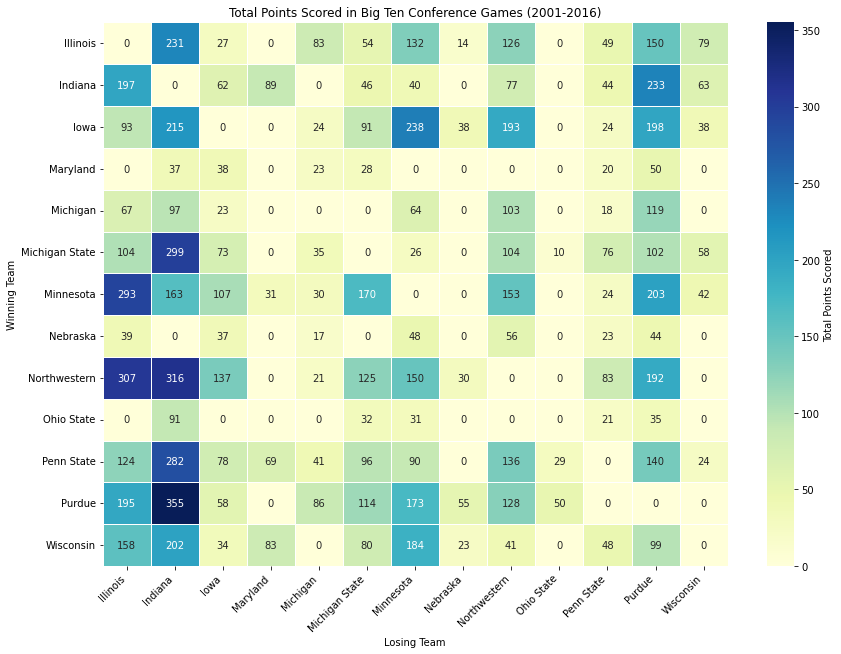

In [29]:
game_data = games_df_new

# Filter data to only include games from 2011-2016, within the Big Ten Conference, and that are conference games
big_ten_data = game_data[(game_data['Season'].between(2001, 2016)) & 
                         (game_data['winner_conference'] == 'Big Ten Conference') &
                          (game_data['loser_conference'] == 'Big Ten Conference') & 
                         (game_data['game_type'] == 'Conference')]

# Group by winner and loser to get sum of points scored
points_scored_big_ten = big_ten_data.groupby(['Winner', 'Loser']).agg({'Pts': 'sum'}).reset_index()

def plot_big_ten_heatmap(data):
    # Pivot the data for the heatmap
    heatmap_data = data.pivot('Winner', 'Loser', 'Pts')
    # Fill NaN with 0 and remove rows and columns that have only zeros
    heatmap_data = heatmap_data.fillna(0)
    heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1) > 0, heatmap_data.sum(axis=0) > 0]
    
    if heatmap_data.empty:
        print("No sufficient data available for the heatmap.")
        return
    
    plt.figure(figsize=(14, 10))
    sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt=".0f", cbar_kws={'label': 'Total Points Scored'})
    plt.title('Total Points Scored in Big Ten Conference Games (2001-2016)')
    plt.ylabel('Winning Team')
    plt.xlabel('Losing Team')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

# Plot the heatmap for Big Ten Conference games from 2011-2016
plot_big_ten_heatmap(points_scored_big_ten)


C:\Users\Justin\AppData\Local\Temp\ipykernel_7448\3431419096.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_ten_data_diff['point_diff'] = big_ten_data_diff['Pts'] - big_ten_data_diff['Pts.1']


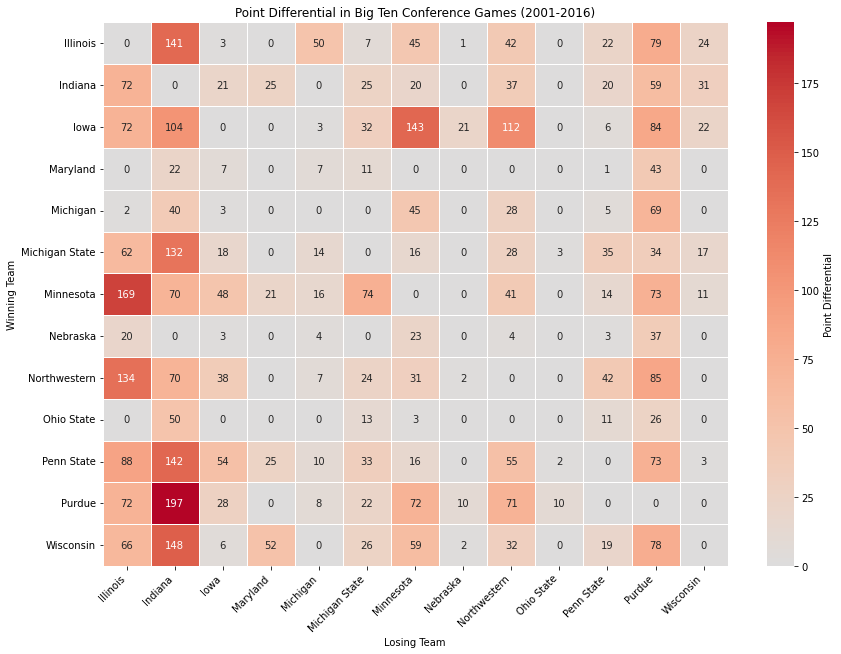

In [30]:
# Filter data to only include games from 2001-2016, within the Big Ten Conference, and that are conference games
big_ten_data_diff = game_data[(game_data['Season'].between(2001, 2016)) & 
                              (game_data['winner_conference'] == 'Big Ten Conference') &
                              (game_data['loser_conference'] == 'Big Ten Conference') & 
                              (game_data['game_type'] == 'Conference')]

# Compute point differential for each game
big_ten_data_diff['point_diff'] = big_ten_data_diff['Pts'] - big_ten_data_diff['Pts.1']

# Group by winner and loser to get sum of point differentials
point_diff_big_ten = big_ten_data_diff.groupby(['Winner', 'Loser']).agg({'point_diff': 'sum'}).reset_index()

def plot_big_ten_diff_heatmap(data):
    # Pivot the data for the heatmap
    heatmap_data = data.pivot('Winner', 'Loser', 'point_diff')
    # Fill NaN with 0 and remove rows and columns that have only zeros
    heatmap_data = heatmap_data.fillna(0)
    heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1) > 0, heatmap_data.sum(axis=0) > 0]
    
    if heatmap_data.empty:
        print("No sufficient data available for the heatmap.")
        return
    
    plt.figure(figsize=(14, 10))
    sns.heatmap(heatmap_data, cmap="coolwarm", center=0, linewidths=.5, annot=True, fmt=".0f", cbar_kws={'label': 'Point Differential'})
    plt.title('Point Differential in Big Ten Conference Games (2001-2016)')
    plt.ylabel('Winning Team')
    plt.xlabel('Losing Team')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

# Plot the heatmap for Big Ten Conference games from 2001-2016
plot_big_ten_diff_heatmap(point_diff_big_ten)
